# Trends and Predictors of Pregnancy Anemia in Rwanda: A Longitudinal Analysis of DHS Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat 
import seaborn as sns
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def wrangle_csv_file(filepath):
    """A function that reads csv files, create a copy of dataframe of features of interest, 
    rename column headers appropriately, and consider entries where women were pregnant
    args:
    filepath(int): file location
    return: dataframe"""
    # import csv file
    df = pd.read_csv(filepath)

    # List of features we are interested in
    features = ["V010","V106","V501", "V190","V213","V437","V438","V445","V101",
            "V113","V453","V457"]

    # create a dataframe of the features we chose as a copy
    dff = df[features].copy()

    # Rename the column headers appropriately
    dff.rename(columns={
    'V010': "Birth_year", 'V106':"Highest_education_level", 'V501':"Marital_status", 
    'V190':"Wealth_index", 'V213':"Currently_pregnant",
    'V101':"Region_residence","V437":"Weight","V445":"bmi",
    'V113':"Source_of _drinking_water", 'V453':"Hemoglobin_level", 'V457':"Anemia_level",
    "V438": "Height"
    }, inplace=True)

    # Select entries where "currently_pregnant" is yes
    dff = dff.loc[dff['Currently_pregnant'] == '1']

    # Select entries with Anemia level 1,2,3,4
    dff = dff.loc[(dff["Anemia_level"] == '1')| (dff["Anemia_level"] =='2')|(dff["Anemia_level"]=='3')|(dff["Anemia_level"]=='4')]

    # Transform dataframe data type into integers
    for col in dff.columns:
        dff[col] = dff[col].astype(int, errors='ignore')
    
    
    return dff

def wrangle_stat_file(filepath):
    """A function that reads csv files, create a copy of dataframe of features 
    of interest, rename column headers appropriately
    args:
    filepath(int): file location
    return: dataframe"""

    # import stat file
    if filepath.lower().endswith(".SAV".lower()):
        df,meta = pyreadstat.read_sav(filepath)
    elif filepath.lower().endswith(".DTA".lower()):
        df,meta = pyreadstat.read_dta(filepath)

    # List of features we are interested in
    features = ["v010","v106","v501", "v190","v213","v437","v438","v445",
                "v101","v113","v453","v457","m45_1"]
    
    # create a dataframe of the features we chose as a copy
    dff = df[features].copy()    

    # Rename the column headers appropriately
    dff.rename(columns={
    'v010': "Birth_year", 'v106':"Highest_education_level", 'v501':"Marital_status", 
    'v190':"Wealth_index", 'v213':"Currently_pregnant",
    'v101':"Region_residence","v437":"Weight","v438":"Height",
    "v445":"bmi",'v113':"Source_of _drinking_water", 'v453':"Hemoglobin_level", 
    'v457':"Anemia_level","m45_1":"Iron_supplements"}, inplace=True)

    # Select entries where "currently_pregnant" is yes
    dff = dff.loc[dff['Currently_pregnant'] == 1]

    # Select entries with Anemia level 1,2,3,4
    dff = dff.loc[(dff["Anemia_level"] == 1)| (dff["Anemia_level"] ==2)|(dff["Anemia_level"]==3)|(dff["Anemia_level"]==4)]

    # Transform dataframe data type into integers
    for col in dff.columns:
        dff[col] = dff[col].astype(int, errors='ignore')
   

    
    return dff


In [3]:
# IMPORT THE CSV FILE TO WORK WITH
df_10 = wrangle_csv_file("2010/Woman.csv")
df_15 = wrangle_stat_file("2015/RWIR70FL.DTA")
df_20 = wrangle_stat_file("2020/RWIR81FL.DTA")
print(df_10.shape)
print(df_15.shape)
print(df_20.shape)


(479, 12)
(480, 13)
(413, 13)


### Explore

In [4]:
df_10.head()

,Birth_year,Highest_education_level,Marital_status,Wealth_index,Currently_pregnant,Weight,Height,bmi,Region_residence,Source_of _drinking_water,Hemoglobin_level,Anemia_level
27,1984,1,0,1,1,779,1600,3043,2,21,148,4
33,1985,1,1,4,1,543,1580,2175,5,43,119,4
34,1988,0,2,2,1,636,1520,2753,5,43,132,4
55,1984,1,1,3,1,597,1580,2391,5,43,132,4
71,1986,0,2,2,1,573,1553,2376,3,41,136,4


In [22]:
# Create histogram
#def create_hist(df):
 #   for column in df.columns:
 #       histogram = df[column].plot(kind="hist", xlabel=column, title=f"A distribution of {column}")
 #   return histogram
import seaborn as sns

def create_hist(df):
    # Create a new figure to contain all histograms and KDE plots
    fig, axs = plt.subplots(len(df.columns), 1, figsize=(8, len(df.columns) * 4))
    
    # Iterate over each column and plot its histogram and KDE plot
    for i, column in enumerate(df.columns):
        sns.histplot(data=df, x=column, kde=True, ax=axs[i])  # Plot histogram with KDE
        axs[i].set_xlabel(column)
        axs[i].set_title(f"A distribution of {column}")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()  # Display the figure with all histograms and KDE plots



/Users/nzeyimanajanvier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nzeyimanajanvier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nzeyimanajanvier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nzeyimanajanvier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

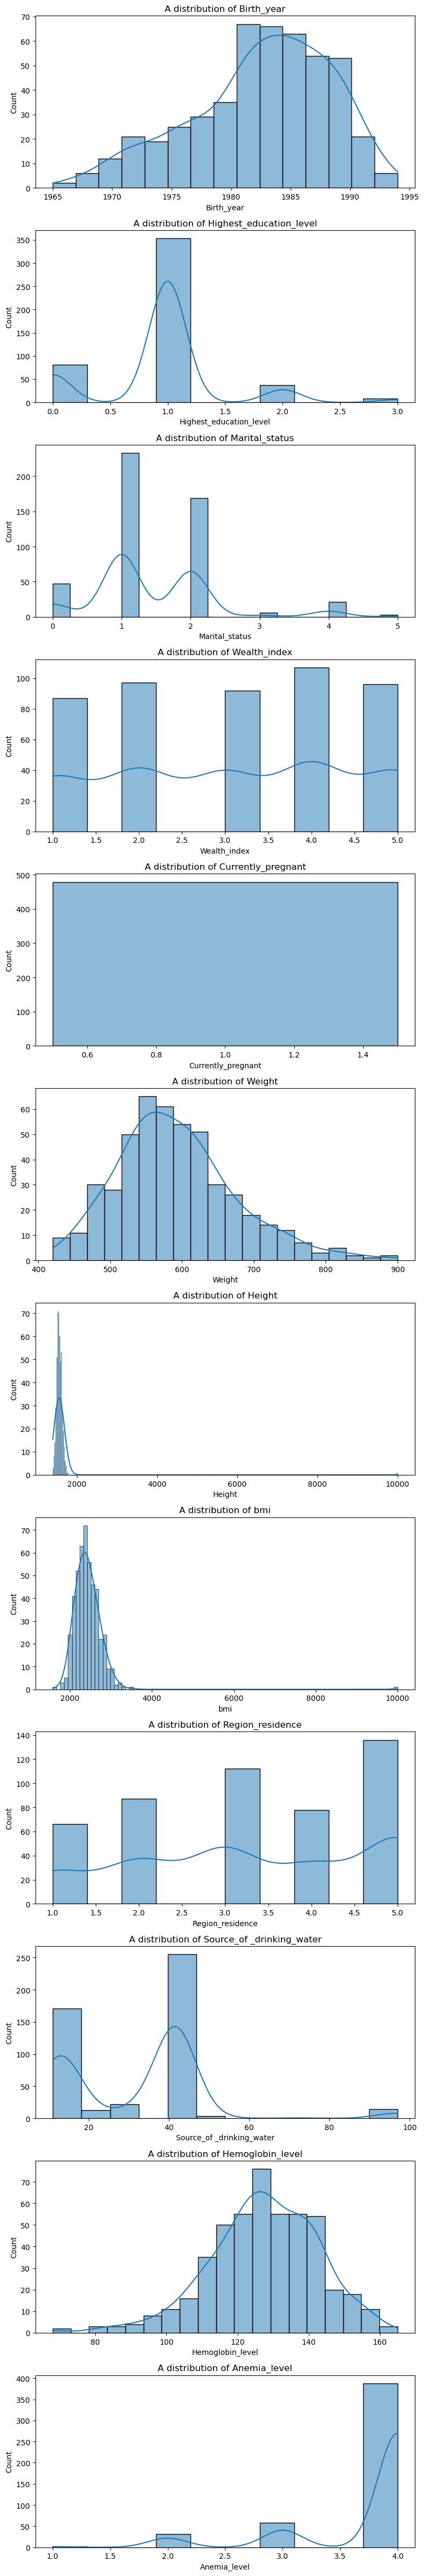

In [23]:
create_hist(df_10)

In [4]:
df_10["dhs_year"] = np.full(len(df_10), 2010)
df_15["dhs_year"] = np.full(len(df_15), 2015)
df_20["dhs_year"] = np.full(len(df_20), 2020)

In [5]:
def reshape_df (df):
    ed_level = {0:"No education",1:"Primary",3:"Secondary",3:"Higher"}
    mar_status = {
        0:"Never in union", 1:"Married", 2:"Living with partner", 3:"widowed",
        4:"Divorced", 5:"Separated"
    }
    wealth_index = {
        1:"Poorest", 2:"Poorer", 3:"Middle", 4:"Richer", 5:"Richest"
    }
    residence = {
        1:"Kigali city", 2:"South", 3:"West", 4: "North", 5:"East"
    }
    anemia_level = {
        1:"Severe", 2:"Moderate",3:"Mild",4:"Not anemic"
    }
    source = {
        10:"Piped water", 11:"Piped into dweelling",12:"Piped to yard",
        13:"Public tap", 20:"Tube well water", 21:"Borehole", 30:"Dug well(open/protected)",
        31:"Protected well", 32:"Unprotected well", 40:"Surface water", 41:"Protected spring",
        42:"Unprotected spring", 43:"River/dam/lake", 51:"Rainwater", 61:"Tanker truck",
        62:"Cart with small tank", 71:"Bottled water", 96:"Other", 97:"Not a dejure resident"
    }
    df["Highest_education_level"].replace(ed_level,inplace=True)
    df["Marital_status"].replace(mar_status,inplace=True)
    df["Wealth_index"].replace(wealth_index, inplace=True)
    df["Region_residence"].replace(residence, inplace=True)
    df["Anemia_level"].replace(anemia_level, inplace=True)
    df["Source_of _drinking_water"].replace(source, inplace=True)
    return df

In [9]:
# Concatenate the datasets
dataframes = [df_10,df_15,df_20]
df = pd.concat(dataframes, ignore_index=True)
df.head()

,Birth_year,Highest_education_level,Marital_status,Wealth_index,Currently_pregnant,Weight,Height,bmi,Region_residence,Source_of _drinking_water,Hemoglobin_level,Anemia_level,dhs_year,Iron_supplements
0,1984,1,0,1,1,779,1600,3043,2,21,148,4,2010,NaN
1,1985,1,1,4,1,543,1580,2175,5,43,119,4,2010,NaN
2,1988,0,2,2,1,636,1520,2753,5,43,132,4,2010,NaN
3,1984,1,1,3,1,597,1580,2391,5,43,132,4,2010,NaN
4,1986,0,2,2,1,573,1553,2376,3,41,136,4,2010,NaN


In [10]:
# reshape the dataframe
reshape_df (df)
df.head()

,Birth_year,Highest_education_level,Marital_status,Wealth_index,Currently_pregnant,Weight,Height,bmi,Region_residence,Source_of _drinking_water,Hemoglobin_level,Anemia_level,dhs_year,Iron_supplements
0,1984,Primary,Never in union,Poorest,1,779,1600,3043,South,Borehole,148,Not anemic,2010,NaN
1,1985,Primary,Married,Richer,1,543,1580,2175,East,River/dam/lake,119,Not anemic,2010,NaN
2,1988,No education,Living with partner,Poorer,1,636,1520,2753,East,River/dam/lake,132,Not anemic,2010,NaN
3,1984,Primary,Married,Middle,1,597,1580,2391,East,River/dam/lake,132,Not anemic,2010,NaN
4,1986,No education,Living with partner,Poorer,1,573,1553,2376,West,Protected spring,136,Not anemic,2010,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Birth_year                 1372 non-null   int64 
 1   Highest_education_level    1372 non-null   object
 2   Marital_status             1372 non-null   object
 3   Wealth_index               1372 non-null   object
 4   Currently_pregnant         1372 non-null   int64 
 5   Weight                     1372 non-null   int64 
 6   Height                     1372 non-null   int64 
 7   bmi                        1372 non-null   int64 
 8   Region_residence           1372 non-null   object
 9   Source_of _drinking_water  1372 non-null   object
 10  Hemoglobin_level           1372 non-null   int64 
 11  Anemia_level               1372 non-null   object
 12  dhs_year                   1372 non-null   int64 
 13  Iron_supplements           484 non-null    object
dtypes: int64

In [12]:
df.groupby(["dhs_year","Anemia_level"])["Currently_pregnant"].count()

dhs_year  Anemia_level
2010      Mild             58
          Moderate         31
          Not anemic      388
          Severe            2
2015      Mild             66
          Moderate         40
          Not anemic      374
2020      Mild             63
          Moderate         37
          Not anemic      312
          Severe            1
Name: Currently_pregnant, dtype: int64

In [26]:
# Instantiate the Plotly charting library.
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
# We use plotly.offline as this allows us to create interactive 
# visualisations without the use of an internet connection, 
# making our notebook more distributable to others. 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# The Cufflinks library allows us to directly bind 
# Pandas DataFrames to Plotly charts. 
import cufflinks as cf
# Once again, we use the Cufflinks library in offline mode. 
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options. We use these to make our interactive 
# visualisations more aesthetically appealing. 
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [27]:
from ipywidgets import interact, interact_manual, widgets

In [54]:
@interact_manual
def bar_graph(category1=list(df.loc[df["dhs_year"]==2015].columns),
              category2=list(df.select_dtypes('object').columns),
                 values="Currently_pregnant"):
    #print(f"Correlation: {df[column1].corr(df[column2])}")
    data = df.groupby([category1, category2])[values].count().unstack()
    #plt.figure(figsize=(10, 6))
    data.plot(kind='bar', figsize=(10, 6))
    #sns.barplot(x=category1, y=values, hue=category2, data=data)
    #plt.title("Count of Currently Pregnant Women by Anemia Level and DHS Year")
    #plt.xlabel("DHS Year")
    #plt.ylabel("Count of Currently Pregnant Women")
    plt.legend(title="Anemia Level")
    plt.show();

/var/folders/tb/jzz8pkkj4wjdzgdyxtqmpfnr0000gn/T/ipykernel_27678/3808908948.py:1: DeprecationWarning:

on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').



interactive(children=(Dropdown(description='category1', options=('Birth_year', 'Highest_education_level', 'Mar…

In [52]:
@interact_manual
def bar_graph(category1=list(df.columns),
              category2=list(df.select_dtypes('object').columns),
                 values="Currently_pregnant"):
    result = df.groupby(["dhs_year", "Anemia_level"])["Currently_pregnant"].count().reset_index()

    # Plot using Matplotlib
    plt.figure(figsize=(10, 6))
    for anemia_level, data in result.groupby('Anemia_level'):
        plt.plot(data['dhs_year'], data['Currently_pregnant'], label=anemia_level)

    #plt.xlabel('Year')
    #plt.ylabel('Count')
    #plt.title('Count of Currently Pregnant by Anemia Level over Years')
    plt.legend()
    plt.grid(True)
    plt.show();

/var/folders/tb/jzz8pkkj4wjdzgdyxtqmpfnr0000gn/T/ipykernel_27678/2911874592.py:1: DeprecationWarning:

on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').



interactive(children=(Dropdown(description='category1', options=('Birth_year', 'Highest_education_level', 'Mar…

In [14]:
import pandas as pd
from ydata_profiling import ProfileReport


# Generate the profile report
profile = ProfileReport(df, title='Sociodemographic Characteristics Report')

# Print the report or save it to an HTML file
profile  # Display report in Jupyter Notebook
# profile.to_file("sociodemographic_report.html")  # Save report to an HTML file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]